# Function plots


# 1. Plot sine function

In [100]:
%matplotlib inline
from matplotlib import pyplot as plt


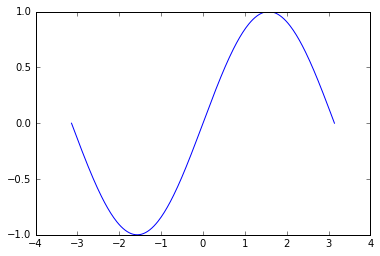

In [101]:
import numpy as np
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
f = np.sin(X)

plt.plot(X, S)

plt.show()


# 2. Plot sweep (chirp) sine function

In [102]:
import numpy as np
from scipy.signal import chirp, sweep_poly

See scipy.signal.chirp doc: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.chirp.html
AND Scipy Cookbook - frequency swept demo: https://scipy.github.io/old-wiki/pages/Cookbook/FrequencySweptDemo.html

## 2.1. Linear sweep 

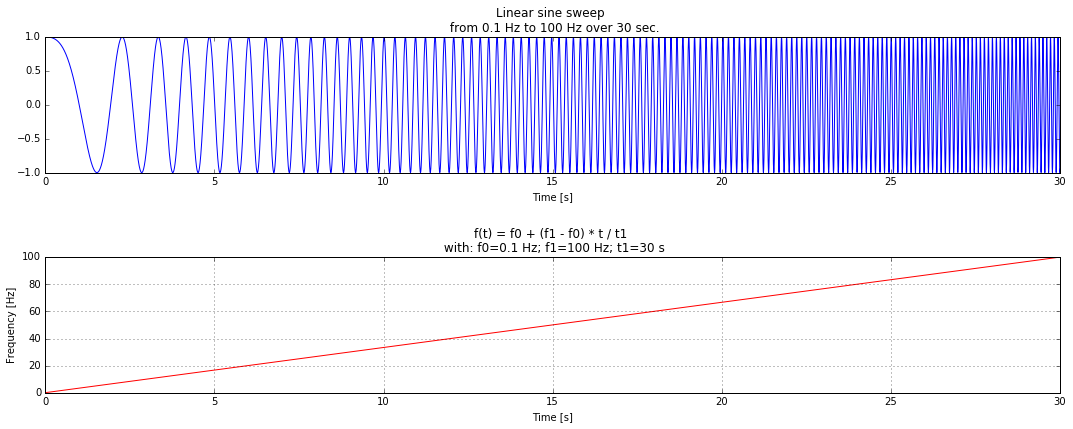

In [103]:
t = np.linspace(0, 30, 10001)
f0 = 0.1
f1 = 100
t1 = 30 
w = chirp(t, f0, f1, t1, method='linear')

from pylab import figure, plot, show, xlabel, ylabel, subplot, grid, title, \
                    yscale, savefig, clf
    
plt.figure(figsize=(15,6))


subplot(2,1,1)
plt.plot(t, w)
title('Linear sine sweep \n from %g Hz to %g Hz over %g sec.' %(f0, f1, t1))
xlabel('Time [s]')
# tight_layout allows to plot with adequate spacing between subplots to avoid overlap with titles etc
plt.tight_layout()

subplot(2,1,2)
title('f(t) = f0 + (f1 - f0) * t / t1 \n with: f0=%g Hz; f1=%g Hz; t1=%g s' %(f0, f1, t1))
plot(t, f0 + (f1-f0)*t/t1, 'r')
grid(True)
ylabel('Frequency [Hz]')
xlabel('Time [s]')
plt.tight_layout(h_pad=3)

plt.savefig("Sine_sweep_Lin.png", dpi=72)



## 2.2. Logarithmic sweep

ZeroDivisionError: float division by zero

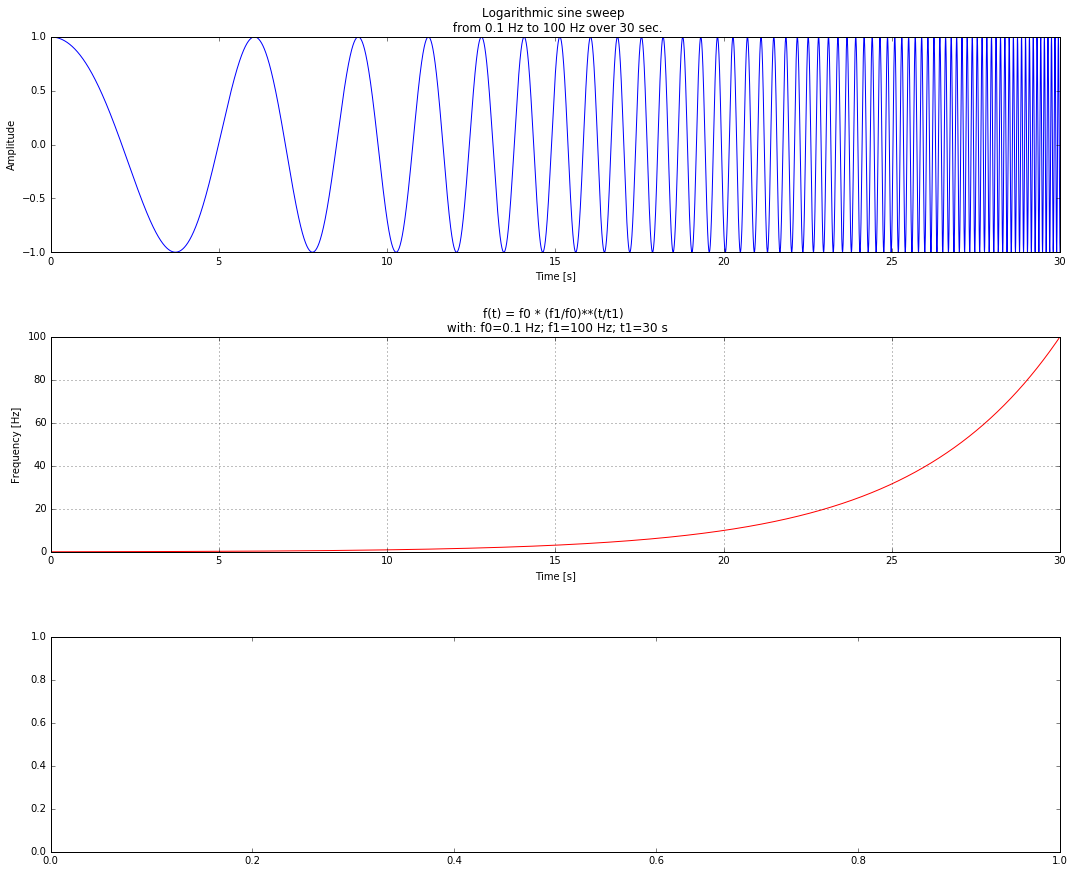

In [113]:
t = np.linspace(0, 30, 10001)
w = chirp(t, f0=0.1, f1=10, t1=30, method='logarithmic')

#from future import division
from numpy import sin, linspace, pi
from pylab import figure, plot, show, xlabel, ylabel, subplot, grid, title, \
                    yscale, savefig, clf
from scipy import fft, arange

  
plt.figure(figsize=(15,12))

#####################################################################################################################
subplot(3,1,1)
plt.plot(t, w)
title('Logarithmic sine sweep \n from %g Hz to %g Hz over %g sec.' %(f0, f1, t1))
xlabel('Time [s]')
ylabel('Amplitude')
# tight_layout allows to plot with adequate spacing between subplots to avoid overlap with titles etc
plt.tight_layout()

#####################################################################################################################
subplot(3,1,2)
title('f(t) = f0 * (f1/f0)**(t/t1) \n with: f0=%g Hz; f1=%g Hz; t1=%g s' %(f0, f1, t1))
plot(t, f0 * (f1/f0)**(t/t1), 'r')
grid(True)
ylabel('Frequency [Hz]')
xlabel('Time [s]')
plt.tight_layout(h_pad=3)

#####################################################################################################################
#Plot frequency spectrum of the function
subplot(3,1,3)
ps = np.abs(np.fft.fft(w))**2

time_step = 1 / 30
freqs = np.fft.fftfreq(w.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

plt.savefig("Sine_sweep_Log.png", dpi=72)

